In [13]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Data preprocessing

In [14]:
# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
#Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
#Changing the shape to (height, weight, channel)
train_images= np.expand_dims(train_images, -1)
test_images = np.expand_dims (test_images, -1)

In [17]:
# Normalize pixel values to [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

Defining the model (CNN)

In [19]:
#Build model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [20]:
#Compile the model
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model training

In [21]:
# Train the CNN model using augmented data
cnn_model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          epochs=10,
          validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 48ms/step - accuracy: 0.6769 - loss: 0.8681 - val_accuracy: 0.8078 - val_loss: 0.4911
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8049 - loss: 0.5163 - val_accuracy: 0.8426 - val_loss: 0.4155
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.8313 - loss: 0.4483 - val_accuracy: 0.8734 - val_loss: 0.3473
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.8520 - loss: 0.3992 - val_accuracy: 0.8762 - val_loss: 0.3372
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.8575 - loss: 0.3781 - val_accuracy: 0.8789 - val_loss: 0.3336
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.8635 - loss: 0.3614 - val_accuracy: 0.8851 - val_loss: 0.3117
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.8678 - loss: 0.3491 - val_accuracy: 0.8874 - val_loss: 0.3041
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - accuracy: 0.8749 -

Evaluation

In [22]:
#Evaluate Accuracy
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.8868 - loss: 0.3004

Test accuracy: 0.8867999911308289


In [23]:
#Convert Model Outputs to Class Probabilities and Predictions
probability_model = tf.keras.Sequential([cnn_model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [24]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.77      0.83      1000
     Trouser       0.97      0.98      0.98      1000
    Pullover       0.87      0.80      0.83      1000
       Dress       0.92      0.87      0.89      1000
        Coat       0.83      0.83      0.83      1000
      Sandal       0.91      0.99      0.95      1000
       Shirt       0.63      0.78      0.69      1000
     Sneaker       0.97      0.90      0.93      1000
         Bag       0.97      0.99      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



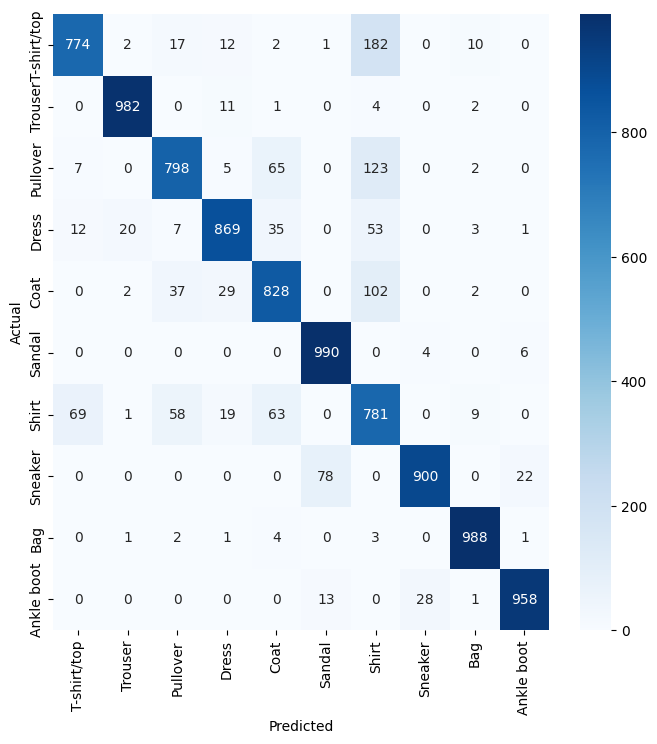

In [25]:
#Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [26]:
#Plots the image with predicted and true labels
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Fix: pass the image to tf.squeeze
    img = tf.squeeze(img)  # removes extra channel dimension (32,32,1) -> (32,32)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

#Plots the prediction confidence for each class
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

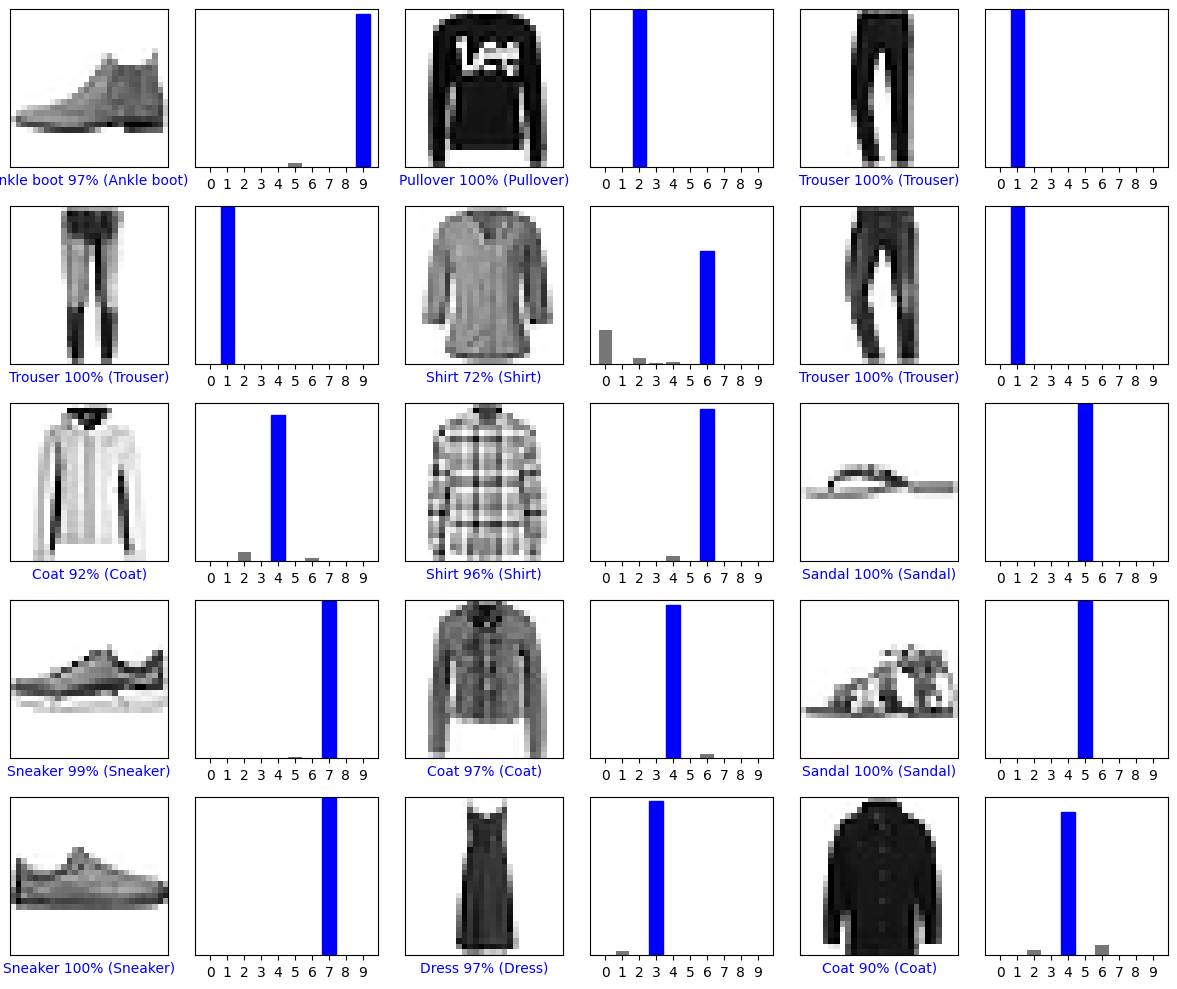

In [27]:
# Visualize predictions and confidence scores for multiple test images
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()